In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import glob
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.collections import PolyCollection

In [2]:
def detrend(new_data, deg):

    # calculate trendline
    polyfit = new_data.polyfit(dim='time', deg=deg)
    # print(polyfit)
    trend = xr.polyval(new_data.time, polyfit.polyfit_coefficients)
    
    # subtract trendline from data 
    anoms = new_data-trend 

    slope = (trend[-1] - trend[0])/len(trend)
    
    return anoms, trend, slope

In [12]:
def get_monthly_anomalies(new_data):

    new_data, trend, slope = detrend(new_data,1)
    
    climat = new_data.groupby('time.month').mean(dim='time', skipna=True)
    anoms = new_data.groupby('time.month') - climat 

    return anoms, new_data, trend

## Pan-Arctic

In [13]:
file = '/glade/work/mollyw/Projects/sea_ice_covariability/data/cryosat-2/cryosat-2/cs2_landy_data.nc'
data = xr.open_dataset(file)

years = []
for i in range(2011, 2021):
    thing = data.groupby('time.year')[i].groupby('time.month').mean(dim='time')
    thing = thing.rename({'month':'time'})
    
    years.append(thing)

data = xr.concat(years, dim='time')

time = pd.date_range(start='2011-01-15',end= '2020-08-15', freq = '1M')
data['time'] = time

In [14]:
file = '/glade/work/mollyw/Projects/sea_ice_covariability/data/cryosat-2/piomas/piomas_biweekly_data.nc'
pdata = xr.open_dataset(file)

years = []
for i in range(2011, 2021):
    thing = pdata.groupby('time.year')[i].groupby('time.month').mean(dim='time')
    thing = thing.rename({'month':'time'})
    
    years.append(thing)

pdata = xr.concat(years, dim='time')

time = pd.date_range(start='2011-01-15',end= '2020-08-15', freq = '1M')
pdata['time'] = time

In [23]:
siv_anoms, siv_detrend, siv_trend = get_monthly_anomalies(data.SIV)
sia_anoms, sia_detrend, sia_trend = get_monthly_anomalies(data.SIA)

df_SIV = siv_anoms.to_dataframe(name='siv')
df_SIA = sia_anoms.to_dataframe(name='sia')

psiv_anoms, psiv_detrend, psiv_trend = get_monthly_anomalies(pdata.SIV)
psia_anoms, psia_detrend, psia_trend = get_monthly_anomalies(pdata.SIA)

pdf_SIV = psiv_anoms.to_dataframe(name='siv')
pdf_SIA = psia_anoms.to_dataframe(name='sia')

/glade/scratch/mollyw/ipykernel_255226/2673591768.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(np.arange(2010,2022), rotation=90)
/glade/scratch/mollyw/ipykernel_255226/2673591768.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(np.arange(2010,2022), rotation=90)


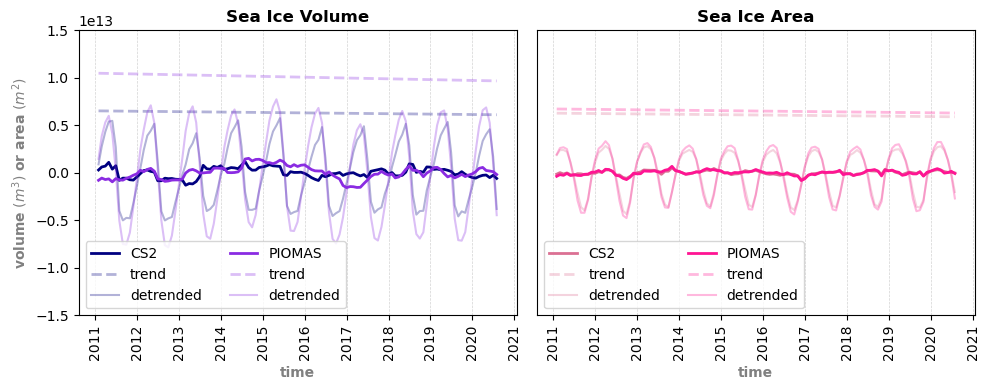

In [113]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,4))

axes[0].grid(which = 'major', axis='x', color='lightgrey', linestyle='dashed', linewidth = 0.5, zorder = 6)
axes[0].plot(siv_anoms.time, siv_anoms, color = 'navy', linewidth = 2)
axes[0].plot(siv_anoms.time, siv_trend, color = 'navy', alpha = 0.3,linewidth = 2, linestyle = 'dashed')
axes[0].plot(siv_anoms.time, siv_detrend, color = 'navy', alpha = 0.3)
axes[0].plot(psiv_anoms.time, psiv_anoms, color = 'blueviolet', linewidth = 2)
axes[0].plot(psiv_anoms.time, psiv_trend, color = 'blueviolet', alpha = 0.3, linewidth = 2, linestyle = 'dashed')
axes[0].plot(psiv_anoms.time, psiv_detrend, color = 'blueviolet', alpha = 0.3)

axes[0].set_ylim([-1.5e13, 1.5e13])
axes[0].set_xticklabels(np.arange(2010,2022), rotation=90)
axes[0].set_title('Sea Ice Volume', fontweight='bold', fontsize=12)
axes[0].set_ylabel('volume $(m^3)$ or area $(m^2)$', fontweight='bold', color='grey')
axes[0].set_xlabel('time', fontweight='bold', color = 'grey')
axes[0].legend(['CS2', 'trend', 'detrended', 'PIOMAS', 'trend','detrended'], ncols=2, loc = 'lower left')

axes[1].grid(which = 'major', axis='x', color='lightgrey', linestyle='dashed', linewidth = 0.5, zorder = 6)
axes[1].plot(sia_anoms.time, sia_anoms, color = 'palevioletred', linewidth = 2)
axes[1].plot(sia_anoms.time, sia_trend, color = 'palevioletred', alpha = 0.3, linewidth = 2, linestyle = 'dashed')
axes[1].plot(sia_anoms.time, sia_detrend, color = 'palevioletred', alpha = 0.3)
axes[1].plot(psia_anoms.time, psia_anoms, color = 'deeppink', linewidth = 2)
axes[1].plot(psia_anoms.time, psia_trend, color = 'deeppink', alpha = 0.3, linewidth = 2, linestyle = 'dashed')
axes[1].plot(psia_anoms.time, psia_detrend, color = 'deeppink', alpha = 0.3)

axes[1].set_ylim([-1.5e13, 1.5e13])
axes[1].set_yticks([])
axes[1].set_yticklabels([])
# axes[1].set_ylabel('area $(m^2)$', fontweight='bold', color='grey')
axes[1].set_xlabel('time', fontweight='bold', color = 'grey')
axes[1].set_xticklabels(np.arange(2010,2022), rotation=90)
axes[1].set_title('Sea Ice Area', fontweight='bold', fontsize=12)
axes[1].legend(['CS2', 'trend', 'detrended', 'PIOMAS', 'trend','detrended'], ncols=2, loc = 'lower left')

plt.tight_layout()

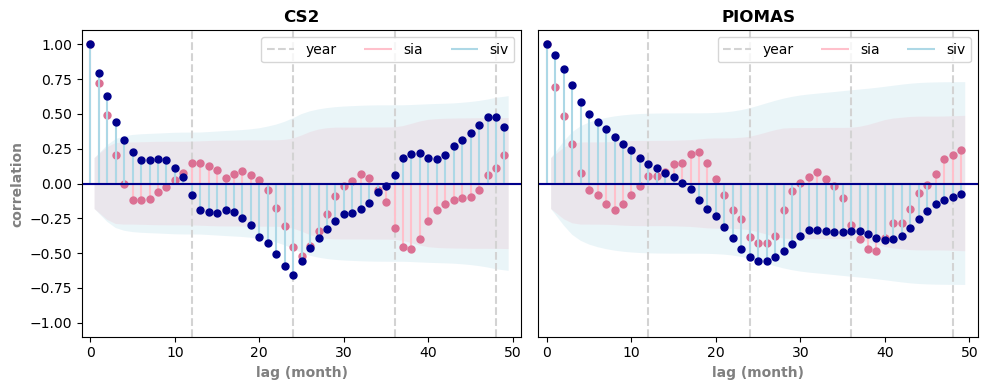

In [35]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,4))

line1 = axes[0].vlines(x = 12, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')
axes[0].vlines(x = 24, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')
axes[0].vlines(x = 36, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')
axes[0].vlines(x = 48, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')

pline1 = axes[1].vlines(x = 12, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')
axes[1].vlines(x = 24, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')
axes[1].vlines(x = 36, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')
axes[1].vlines(x = 48, ymin = -1.1, ymax = 1.1, color = 'lightgrey', linestyle = 'dashed')

acf1 = plot_acf(x = df_SIA.sia,lags = np.arange(0,50), adjusted= True, 
         vlines_kwargs = {'color':'pink'}, alpha = 0.05, ax = axes[0], c = 'palevioletred', label = 'sia')
        
acf2 = plot_acf(x = df_SIV.siv,lags = np.arange(0,50), adjusted= True, 
         vlines_kwargs = {'color':'lightblue'}, alpha = 0.05, ax = axes[0], c = 'darkblue', label = 'siv')


acf1 = plot_acf(x = pdf_SIA.sia,lags = np.arange(0,50), adjusted= True, 
         vlines_kwargs = {'color':'pink'}, alpha = 0.05, ax = axes[1], c = 'palevioletred', label = 'sia')
        
acf2 = plot_acf(x = pdf_SIV.siv,lags = np.arange(0,50), adjusted= True, 
         vlines_kwargs = {'color':'lightblue'}, alpha = 0.05, ax = axes[1], c = 'darkblue', label = 'siv')

count = 0
for item in axes[0].collections:
    if type(item)==PolyCollection:
        if count == 0:
            item.set_facecolor('lightpink')
            count += 1
        else:
            item.set_facecolor('lightblue')
            
count = 0
for item in axes[1].collections:
    if type(item)==PolyCollection:
        if count == 0:
            item.set_facecolor('lightpink')
            count += 1
        else:
            item.set_facecolor('lightblue')


axes[0].set_xlim([-1, 51])
axes[0].set_ylim([-1.1, 1.1])
axes[1].set_xlim([-1, 51])
axes[1].set_ylim([-1.1, 1.1])

thing1 = axes[0].collections[4]
thing2 = axes[0].collections[6]
pthing1 = axes[1].collections[4]
pthing2 = axes[1].collections[6]

axes[0].legend([line1, thing1, thing2],['year','sia','siv',], ncols = 3)
axes[0].set_title('CS2', fontweight='bold', fontsize=12)
axes[0].set_xlabel('lag (month)', fontweight = 'bold', color = 'grey')
axes[0].set_ylabel('correlation', fontweight='bold', color = 'grey')
axes[1].legend([pline1, pthing1, pthing2],['year','sia','siv',], ncols = 3)
axes[1].set_title('PIOMAS', fontweight='bold', fontsize=12)
axes[1].set_xlabel('lag (month)', fontweight='bold', color = 'grey')
axes[1].set_yticklabels([])
axes[1].set_yticks([])

plt.tight_layout()

## Grid Cell